# ***Forbes Top 2000 (Year:2017)***

## **Importing the required Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




#### Forbes Top 2000 (Year:2017)<br>
From Kaggle : https://www.kaggle.com/arjunprasadsarkhel/forbes-top-200020172021 <br>
Since 2003, Forbes’ Global 2000 list has measured the world’s largest public companies in terms of four equally weighted metrics: assets, market value, sales, and profits.<br>
This dataset contains the list of the top 2000 companies every year for the past 5 years (2017-2021).<br>
This means it covers the post-pandemic situation as well as during the pandemic situation, hence we can analyze how the world's biggest public companies
endured the pandemic.

## **Read the Dataset**

In [2]:
df=pd.read_excel('DataSets/Forbes-2017.xlsx')

In [5]:
df.shape[1]


8

There are 8 Columns namely *Rank*, *Name*, *Country*, *Sales*, *Profit*, *Assets*, *Market Value*, *Year* in this dataset

In [103]:
df.columns

Index(['Rank', 'Name', 'Country', 'Sales', 'Profit', 'Assets', 'Market Value',
       'Year'],
      dtype='object')

In [104]:
df.head()

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year
0,1,ICBC,China,151.381,41.9837,3473.238,229.805,2017
1,2,China Construction Bank,China,134.242,34.9814,3016.578,200.458,2017
2,3,Berkshire Hathaway,United States,222.935,24.0740,620.854,409.908,2017
3,4,JPMorgan Chase,United States,102.494,24.2310,2512.986,306.616,2017
4,5,Wells Fargo,United States,97.573,21.9380,1943.443,274.385,2017


Since we already have a column Rank, which is distinctive to every row present. Thus Rank has been set as index.

In [105]:
df.set_index('Rank',inplace=True)

In [106]:
df.head(5)

,Name,Country,Sales,Profit,Assets,Market Value,Year
Rank,,,,,,,
1,ICBC,China,151.381,41.9837,3473.238,229.805,2017
2,China Construction Bank,China,134.242,34.9814,3016.578,200.458,2017
3,Berkshire Hathaway,United States,222.935,24.0740,620.854,409.908,2017
4,JPMorgan Chase,United States,102.494,24.2310,2512.986,306.616,2017
5,Wells Fargo,United States,97.573,21.9380,1943.443,274.385,2017


There aren't many NULL values in the Dataset but they are quite a few of them.

In [107]:
df.isnull().sum()

Name            0
Country         0
Sales           2
Profit          0
Assets          1
Market Value    1
Year            0
dtype: int64

In [108]:
df.describe()

,Sales,Profit,Assets,Market Value,Year
count,1998.000000,2000.000000,1999.000000,1999.000000,2000.0
mean,17.680185,1.241552,84.569579,24.423543,2017.0
std,29.329947,2.918115,261.044216,44.772378,0.0
min,0.001000,-13.042100,0.001000,0.072000,2017.0
25%,4.029250,0.317975,10.860500,6.639500,2017.0
50%,8.802500,0.612300,22.884000,11.944000,2017.0
75%,17.449500,1.279825,52.376000,24.362500,2017.0
max,485.252000,45.217000,3473.238000,752.039000,2017.0


All the NULL values are replaced with the mean of that column. Since **Sales** and **Market Value** are of the type Float, Their NULL values are replaced with their mean

In [109]:
df['Sales'].fillna(value=df['Sales'].mean(), inplace=True)

In [110]:
df['Market Value'].fillna(value=df['Market Value'].mean(), inplace=True)

In [111]:
df['Country'].value_counts()

United States     564
Japan             229
China             200
United Kingdom     91
South Korea        64
                 ... 
Jordan              1
Pakistan            1
Puerto Rico         1
Oman                1
Czech Republic      1
Name: Country, Length: 61, dtype: int64

In [112]:
country_vise_sales=df.groupby(['Country'])['Sales'].agg('sum')

In [113]:
country_vise_sales.sort_values(ascending=False)

Country
United States     11503.815000
Japan              4195.509000
China              3904.757000
United Kingdom     1910.350185
Germany            1843.269000
                      ...     
Jordan                2.373000
Egypt                 2.234000
Puerto Rico           1.933000
Pakistan              1.613000
Oman                  1.393000
Name: Sales, Length: 61, dtype: float64

<AxesSubplot:xlabel='Country'>

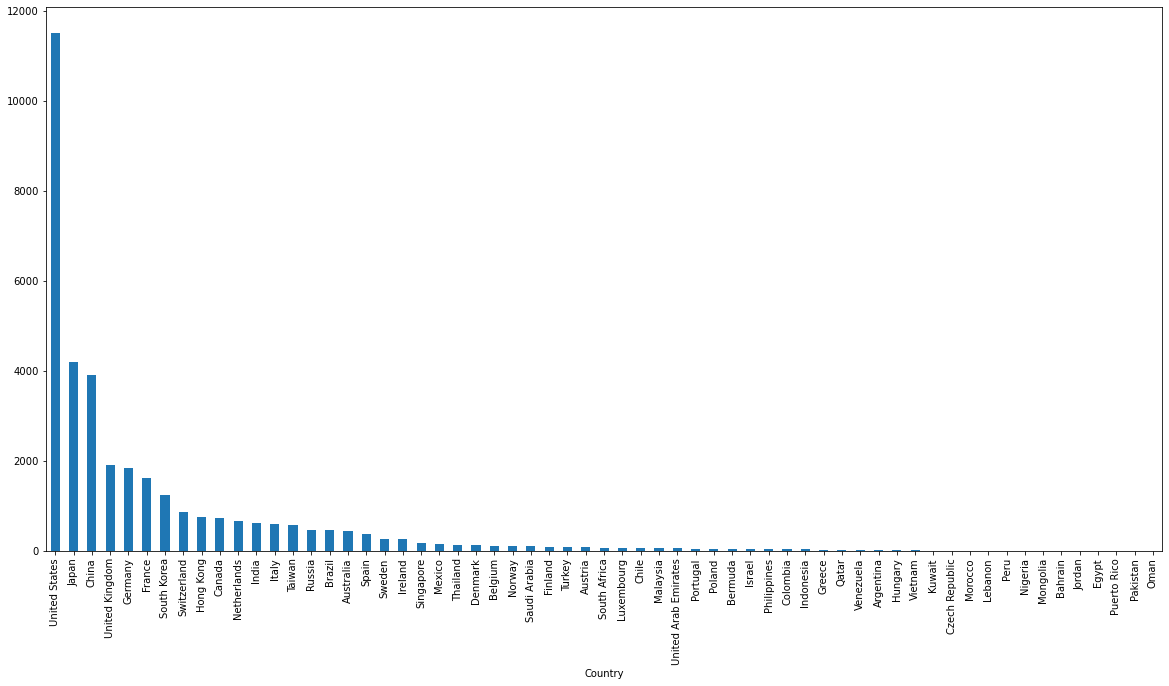

In [114]:
country_vise_sales.sort_values(ascending=False).plot.bar(figsize=(20, 10))

<AxesSubplot:xlabel='Country'>

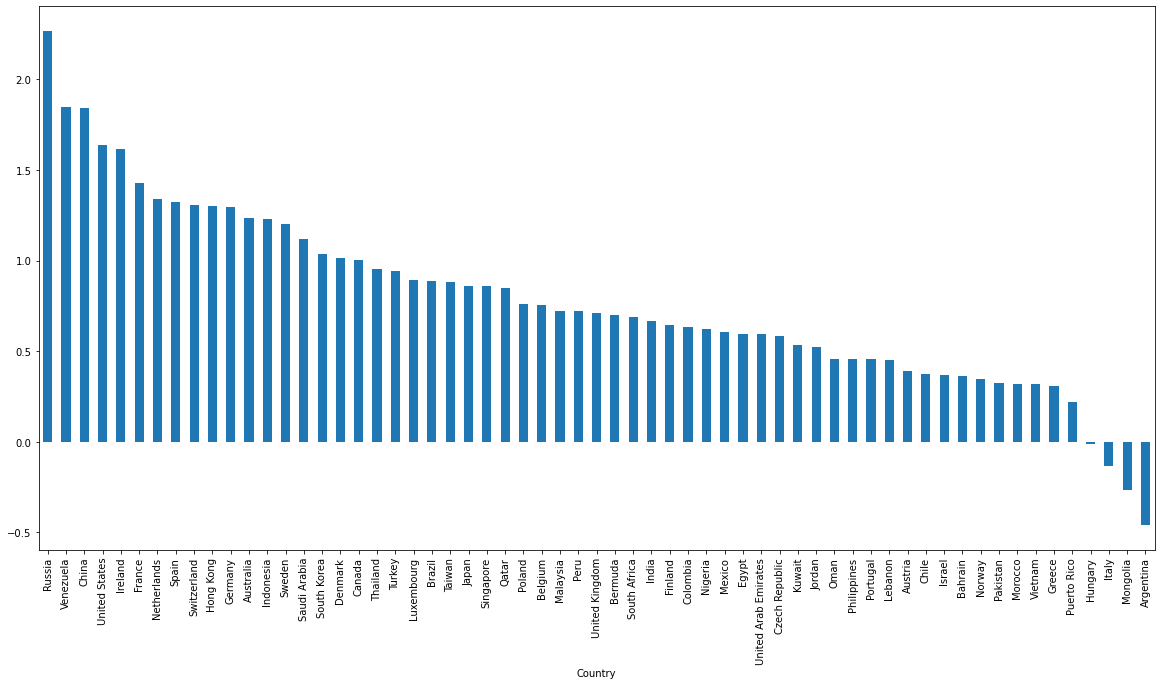

In [129]:
country_vise_profit_mean=df.groupby(['Country'])['Profit'].agg('mean')
country_vise_profit_mean.sort_values(ascending=False).plot.bar(figsize=(20, 10))

